In [1]:
#The Statsmodels tool accesses some deprecated libraries, which results in few warnings while running different code. 
#For the sake of clarity, we can suppress these warnings in our tutorials:
import warnings
warnings.simplefilter('ignore')

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
print(sm.datasets.star98.NOTE)

::

    Number of Observations - 303 (counties in California).

    Number of Variables - 13 and 8 interaction terms.

    Definition of variables names::

        NABOVE   - Total number of students above the national median for the
                   math section.
        NBELOW   - Total number of students below the national median for the
                   math section.
        LOWINC   - Percentage of low income students
        PERASIAN - Percentage of Asian student
        PERBLACK - Percentage of black students
        PERHISP  - Percentage of Hispanic students
        PERMINTE - Percentage of minority teachers
        AVYRSEXP - Sum of teachers' years in educational service divided by the
                number of teachers.
        AVSALK   - Total salary budget including benefits divided by the number
                   of full-time teachers (in thousands)
        PERSPENK - Per-pupil spending (in thousands)
        PTRATIO  - Pupil-teacher ratio.
        PCTAF    - Percenta

In [4]:
data = sm.datasets.star98.load()

In [5]:
data.exog = sm.add_constant(data.exog, prepend=False)

In [6]:
data.exog.shape, data.endog.shape

((303, 21), (303, 2))

### Number of students above national median and number below national median

In [7]:
data.endog[:10]

array([[ 452.,  355.],
       [ 144.,   40.],
       [ 337.,  234.],
       [ 395.,  178.],
       [   8.,   57.],
       [1348.,  899.],
       [ 477.,  887.],
       [ 565.,  347.],
       [ 205.,  320.],
       [ 469.,  598.]])

In [8]:
glm_binom = sm.GLM(data.endog, data.exog, family=sm.families.Binomial())
binom_result = glm_binom.fit()

print(binom_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                  303
Model:                            GLM   Df Residuals:                      282
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2998.6
Date:                Wed, 19 Sep 2018   Deviance:                       4078.8
Time:                        17:21:54   Pearson chi2:                 4.05e+03
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0168      0.000    -38.749      0.000      -0.018      -0.016
x2             0.0099      0.001     16.505      0.0

In [9]:
binom_result.fittedvalues[:10]

array([0.5833118 , 0.75144661, 0.50058272, 0.68534524, 0.32251021,
       0.68693601, 0.33299827, 0.65624766, 0.49851481, 0.506736  ])

In [10]:
np.min(binom_result.fittedvalues), np.max(binom_result.fittedvalues)

(0.0971201652337135, 0.8663145226862592)

In [11]:
original_fitted = np.column_stack((data.endog, binom_result.fittedvalues))

original_fitted.shape

(303, 3)

In [12]:
df = pd.DataFrame(original_fitted, columns=["NABOVE", "NBELOW", "FITTED"])

In [13]:
df.head()

,NABOVE,NBELOW,FITTED
0,452.0,355.0,0.583312
1,144.0,40.0,0.751447
2,337.0,234.0,0.500583
3,395.0,178.0,0.685345
4,8.0,57.0,0.322510


In [14]:
df["PREDICTED_NABOVE"] = (df['NABOVE'] + df['NBELOW']) * df['FITTED']

In [15]:
df.head(10)

,NABOVE,NBELOW,FITTED,PREDICTED_NABOVE
0,452.0,355.0,0.583312,470.732624
1,144.0,40.0,0.751447,138.266177
2,337.0,234.0,0.500583,285.832735
3,395.0,178.0,0.685345,392.702822
4,8.0,57.0,0.322510,20.963164
5,1348.0,899.0,0.686936,1543.545225
6,477.0,887.0,0.332998,454.209644
7,565.0,347.0,0.656248,598.497868
8,205.0,320.0,0.498515,261.720276
9,469.0,598.0,0.506736,540.687315


(0, 2000)

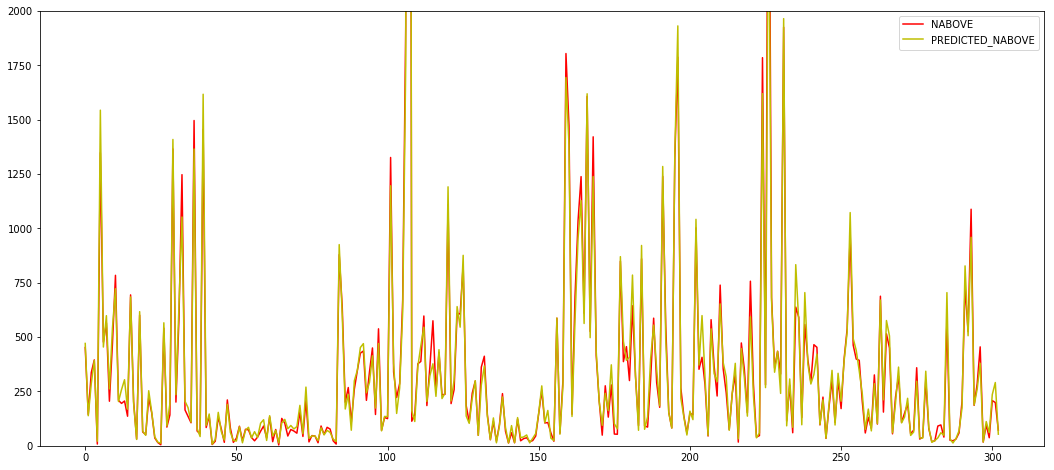

In [16]:
fig, ax = plt.subplots(figsize=(18, 8))

ax.plot(df['NABOVE'], 'r-', label="NABOVE")
ax.plot(df['PREDICTED_NABOVE'], 'y-', label="PREDICTED_NABOVE")

plt.legend()

plt.ylim(0, 2000)